In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


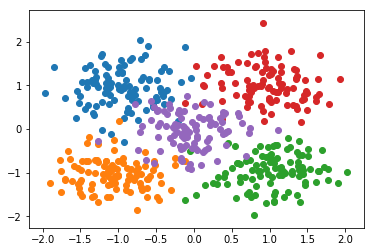

In [40]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers,
                          cluster_std=0.4)
y_cat = to_categorical(y, 5)
print(y_cat)
plt.scatter(X[:,0][y==0], X[:,1][y==0])
plt.scatter(X[:,0][y==1], X[:,1][y==1])
plt.scatter(X[:,0][y==2], X[:,1][y==2])
plt.scatter(X[:,0][y==3], X[:,1][y==3])
plt.scatter(X[:,0][y==4], X[:,1][y==4])
plt.show()

In [46]:
model = Sequential()
model.add(Dense(5, input_shape=(2, ), activation='sigmoid'))
model.add(Dense(5, activation = 'softmax'))
model.compile(Adam(lr = 0.1), 'categorical_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 342us/step - loss: 1.5772 - acc: 0.3380
Epoch 2/100
500/500 [==============================] - 0s 44us/step - loss: 1.0760 - acc: 0.7060
Epoch 3/100
500/500 [==============================] - 0s 28us/step - loss: 0.6464 - acc: 0.8560
Epoch 4/100
500/500 [==============================] - 0s 26us/step - loss: 0.4183 - acc: 0.9020
Epoch 5/100
500/500 [==============================] - 0s 29us/step - loss: 0.3114 - acc: 0.9180
Epoch 6/100
500/500 [==============================] - 0s 31us/step - loss: 0.2624 - acc: 0.9340
Epoch 7/100
500/500 [==============================] - 0s 46us/step - loss: 0.2288 - acc: 0.9380
Epoch 8/100
500/500 [==============================] - 0s 28us/step - loss: 0.2130 - acc: 0.9440
Epoch 9/100
500/500 [==============================] - 0s 40us/step - loss: 0.2008 - acc: 0.9540
Epoch 10/100
500/500 [==============================] - 0s 24us/step - loss: 0.1904 - acc: 0.9460
Epoch 11/100
500/500 [======

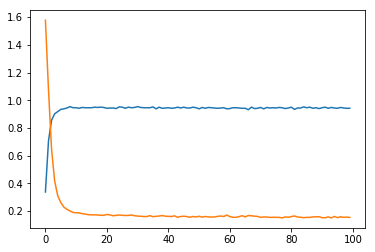

In [47]:
plt.plot(h.history['acc'])
plt.plot(h.history['loss'])
plt.show()

In [48]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contour(xx, yy, z)

In [49]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[:,0][y==0], X[:,1][y==0])
plt.scatter(X[:,0][y==1], X[:,1][y==1])
plt.scatter(X[:,0][y==2], X[:,1][y==2])
plt.scatter(X[:,0][y==3], X[:,1][y==3])
plt.scatter(X[:,0][y==4], X[:,1][y==4])

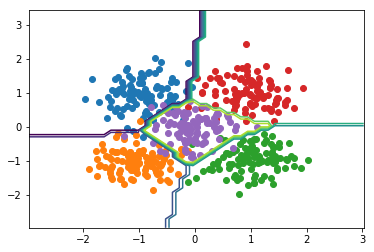

In [50]:
plt.show()